In [ ]:
ls -lh /content/sample_data

total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root root 295K Feb 18 14:33 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Feb 18 14:33 california_housing_train.csv
-rw-r--r-- 1 root root  18M Feb 18 14:33 mnist_test.csv
-rw-r--r-- 1 root root  35M Feb 18 14:33 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md*


In [ ]:
import pandas as pd

quartet = pd.read_json('/content/sample_data/anscombe.json')
quartet.shape

(44, 3)

In [ ]:
quartet.head(5)

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


In [ ]:
quartet.sample(5)

,Series,X,Y
15,II,11,9.26
8,I,12,10.84
35,IV,8,7.71
3,I,9,8.81
12,II,8,8.14


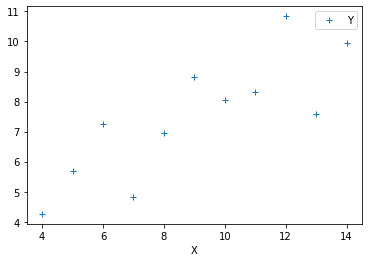

In [ ]:
data = quartet[quartet.Series=='I'].D.sort_index()[['Y']]
data.plot(style='+')

Рассмотрим следующую задачу:   
Необходимо найти функцию, которая бы описывала наши данные

In [ ]:
def foo(x):
  return 2.5 * np.sqrt(x)

array([ 4.        ,  4.20408163,  4.40816327,  4.6122449 ,  4.81632653,
        5.02040816,  5.2244898 ,  5.42857143,  5.63265306,  5.83673469,
        6.04081633,  6.24489796,  6.44897959,  6.65306122,  6.85714286,
        7.06122449,  7.26530612,  7.46938776,  7.67346939,  7.87755102,
        8.08163265,  8.28571429,  8.48979592,  8.69387755,  8.89795918,
        9.10204082,  9.30612245,  9.51020408,  9.71428571,  9.91836735,
       10.12244898, 10.32653061, 10.53061224, 10.73469388, 10.93877551,
       11.14285714, 11.34693878, 11.55102041, 11.75510204, 11.95918367,
       12.16326531, 12.36734694, 12.57142857, 12.7755102 , 12.97959184,
       13.18367347, 13.3877551 , 13.59183673, 13.79591837, 14.        ])

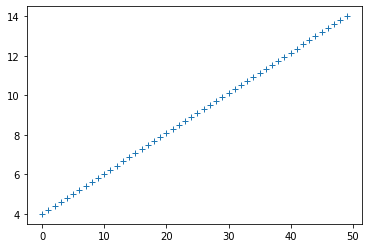

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(4, 14)
plt.plot(xx, '+')
xx

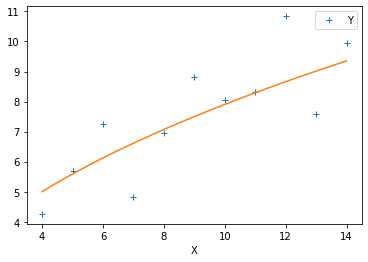

In [ ]:
data.plot(style='+')
plt.plot(xx, foo(xx))
plt.show()

## Интерполяция

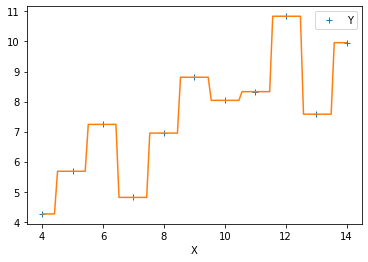

In [ ]:
from scipy import interpolate
interp = interpolate.interp1d(data.index, data.Y, kind='nearest')

data.plot(style='+')
xx = np.linspace(data.index.min(), data.index.max(), 100)
plt.plot(xx, interp(xx))
plt.show()

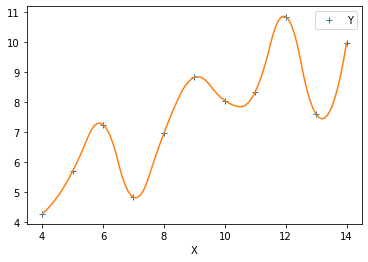

In [ ]:
data.plot(style='+')
plt.plot(xx, interpolate.interp1d(data.index, data.Y, kind='quadratic')(xx))
plt.show()

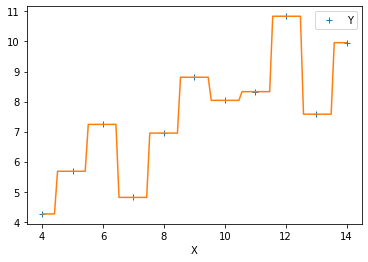

In [ ]:
data.plot(style='+')
plt.plot(xx, interpolate.interp1d(data.index, data.Y, kind='nearest')(xx))
plt.show()

# Регрессии

## Линейная (метод наименьших квадратов)

Линейные методы предполагают, что между признаками объекта (features) и целевой переменной (target/label) существует линейная зависимость, то есть
$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где   
$у$ --- целевая переменная (что мы хотим предсказать),   
$x_i$ --- признак объекта $х$,   
$w_i$ --- вес $i$-го признака,   
$b$ --- bias (смещение, свободный член)  

  
**Функция потерь** --- это мера количества ошибок, которые наша линейная регрессия делает на наборе данных 


$$
\begin{aligned}
L(y_{pred}, Y) &=  \frac{1}{n}\sum_{i=1}^{n}\left(y_{pred} - Y\right)^2 
\end{aligned}
$$

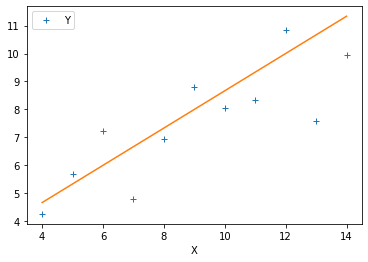

In [ ]:
foo = lambda x: 2 * x/3 + 2
data.plot(style='+')
plt.plot(xx, foo(xx))
plt.show()

In [ ]:
X = data.index.values.reshape(-1, 1)
xx = np.linspace(data.index.min(), data.index.max(), 100).reshape(-1, 1)
print(X.shape, xx.shape)

(11, 1) (100, 1)


[0.50027273] 2.9975454545454534


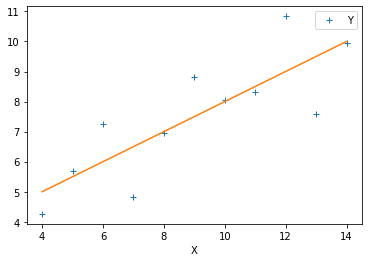

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X, data.Y)
print(linear.coef_, linear.intercept_)
a = linear.coef_[0]
b = linear.intercept_
data.plot(style='+')
plt.plot(xx, a * xx + b)
plt.show()

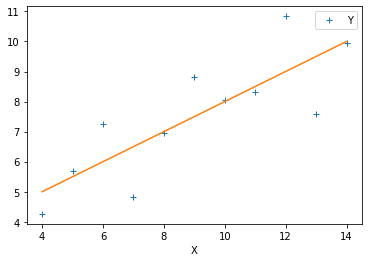

In [ ]:
data.plot(style='+')
plt.plot(xx, linear.predict(xx))
plt.show()

## Полиномиальная

array([[  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.]])

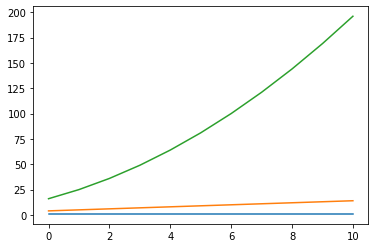

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x2 = poly.fit_transform(X)
plt.plot(x2)
x2

In [ ]:
model2 = LinearRegression(fit_intercept=False).fit(x2, data.Y)
model2.coef_

array([ 0.75748718,  1.06817483, -0.03155012])

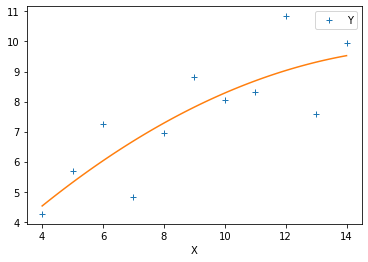

In [ ]:
data.plot(style='+')
xx2 = poly.transform(xx.reshape(-1, 1))
plt.plot(xx, model2.predict(xx2))
plt.show()

В `Pipeline` хранятся все этапы рабочего процесса в виде единого объекта

array([ 2.07539173e+01,  3.47931679e+01,  3.47393201e+01, -1.57479804e+00,
       -4.00722348e+01,  2.82477527e+01, -9.26968547e+00,  1.78639873e+00,
       -2.17532179e-01,  1.69955649e-02, -8.28135328e-04,  2.29488089e-05,
       -2.76489310e-07])

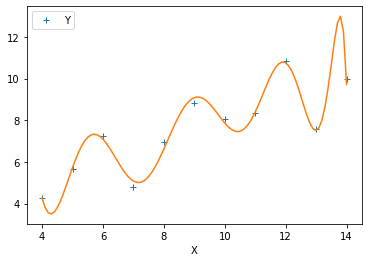

In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=12)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(X, data.Y)
data.plot(style='+')
plt.plot(xx, model.predict(xx))
model['linear'].coef_

## Валидация

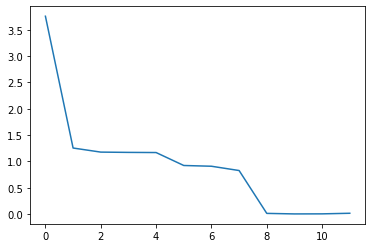

In [ ]:
from sklearn.metrics import mean_squared_error
score=[]
X_ = data.index.values.reshape(-1, 1)
for n in range(12):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  model.fit(X_, data['Y'])
  score.append(mean_squared_error(data['Y'], model.predict(X_)))
plt.plot(score)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xtest, Ytr, Ytest = train_test_split(data.index.values.reshape(-1, 1), data['Y'], random_state=11)
print([d.shape for d in (Xtr, Xtest, Ytr, Ytest)])

[(8, 1), (3, 1), (8,), (3,)]


In [ ]:
train_score=[]
test_score=[]
for n in range(5):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  model.fit(Xtr, Ytr)
  train_score.append(mean_squared_error(Ytr, model.predict(Xtr)))
  test_score.append(mean_squared_error(Ytest, model.predict(Xtest)))

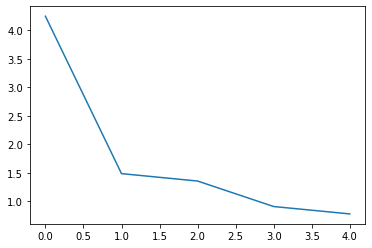

In [ ]:
score = pd.DataFrame({'train': train_score, 'test': test_score})
score.train.plot()
plt.show()

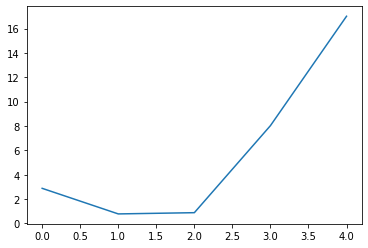

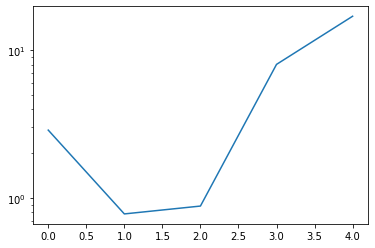

In [ ]:
score.test.plot()
plt.show()

score.test.plot(logy=True)
plt.show()

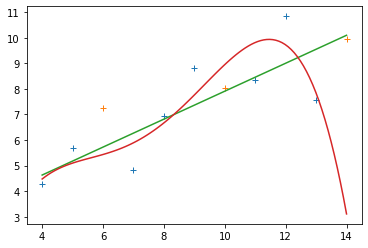

In [ ]:
plt.plot(Xtr, Ytr, '+')
plt.plot(Xtest, Ytest, '+')
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(Xtr, Ytr).predict(xx))
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=4)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(Xtr, Ytr).predict(xx))
plt.show()

## Кроссвалидация

<img src='https://drive.google.com/uc?id=19TOWCsLwIjNSmcHzu46f6JqY5TEefm9h' width=600/>



In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(32, test_size=2, random_state=13)
cv

ShuffleSplit(n_splits=32, random_state=13, test_size=2, train_size=None)

In [ ]:
from sklearn.model_selection import cross_val_score
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(14):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression(fit_intercept=False))])
  sc = cross_val_score(model, X, data.Y, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]
score

,mean,std
0,3.749158e+00,2.256893e+00
1,1.909871e+00,1.463886e+00
2,2.185026e+00,1.781001e+00
3,4.325427e+00,4.749990e+00
4,8.878841e+00,8.700607e+00
5,5.377961e+01,2.312146e+02
6,3.392532e+02,1.145795e+03
7,4.693229e+03,2.060563e+04
8,2.228286e+03,1.153407e+04
9,2.382628e+04,1.272007e+05


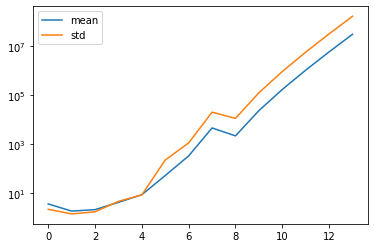

In [ ]:
score.plot(logy=True)
plt.show()

1.9098709850443174

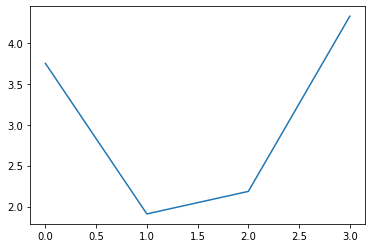

In [ ]:
score[:4]['mean'].plot()
score['mean'].min()

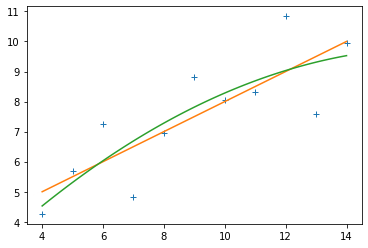

In [ ]:
plt.plot(X, data.Y, '+')
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(X, data.Y).predict(xx))
plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))]).fit(X, data.Y).predict(xx))

plt.show()

## Модели с регуляризацией

Суть регуляризации состоит в том, чтобы добавлять к функции потерь слагаемое, ограничивающее рост весов модели.   
Например, обычная версия линейной регрессии выглядит так:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} \rightarrow \min_{w}.$$

Регуляризованная версия:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} + \lambda\left|\left|w\right|\right|_2^2\rightarrow \min_{w}.$$

Такая версия линейной регресси называется **Ridge**-регрессией.  


В **LASSO** мы штрафуем модель  **на сумму модулей всех ее весов** (на l1-норму весов), таким образом:

$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} + \lambda\left|\left|w\right|\right|_1\rightarrow \min_{w}.$$

**ElasticNet** использует как L1, так и L2 регуляризации:

$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell}  + \lambda_2\left|\left|w\right|\right|_2^2 + \lambda_1\left|\left|w\right|\right|_1 \rightarrow \min_{w}.$$


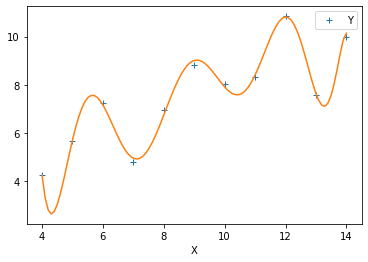

In [ ]:
model_poly11 = Pipeline([('poly', PolynomialFeatures(degree=11)),
                         ('linear', LinearRegression(fit_intercept=False))])
model_poly11.fit(X, data.Y)
data.plot(style='+')
plt.plot(xx, model_poly11.predict(xx))
plt.show()

In [ ]:
model_poly11['linear'].coef_

array([ 2.76975186e+02,  2.79943914e+02, -2.51444563e+00, -3.07223313e+02,
        2.11095542e+02, -6.82253301e+01,  1.29931210e+01, -1.56582160e+00,
        1.21143851e-01, -5.84636135e-03,  1.60444612e-04, -1.91391035e-06])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.248e+00, tolerance: 4.133e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(11, 1)
X
4      4.26
5      5.68
6      7.24
7      4.81
8      6.95
9      8.81
10     8.04
11     8.33
12    10.84
13     7.58
14     9.96
Name: Y, dtype: float64


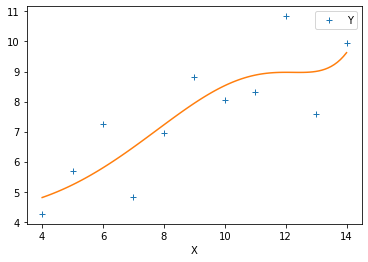

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
model = Pipeline([('poly', PolynomialFeatures(degree=11)),
                  ('linear', ElasticNet())])
model.fit(X, data.Y)
print(X.shape)
print(data.Y)
data.plot(style='+')
plt.plot(xx, model.predict(xx))
plt.show()


In [ ]:
model['linear'].coef_

array([ 0.00000000e+00,  0.00000000e+00,  4.00484580e-03,  7.96270195e-03,
       -1.44903923e-04, -1.42431772e-05, -9.13327699e-07, -4.73022216e-08,
       -1.59430388e-09,  2.77004902e-11,  1.19630669e-11,  1.50983788e-12])

In [ ]:
score = pd.DataFrame(columns=['mean', 'std'])
for n in range(10):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', ElasticNet(fit_intercept=False, tol=1e-4, random_state=13))])
  sc = cross_val_score(model, X, data.Y, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.544e+00, tolerance: 5.593e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.154e-01, tolerance: 5.795e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

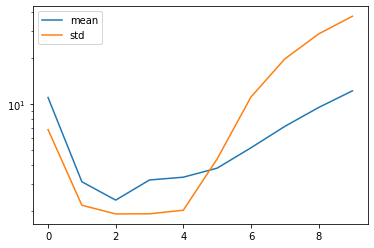

In [ ]:
score.plot(logy=True)
plt.show()

2.3440707642356307

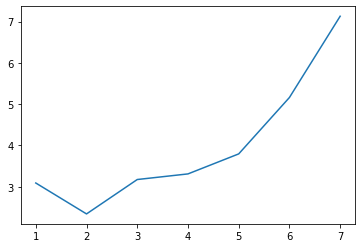

In [ ]:
score[1:8]['mean'].plot()
score['mean'].min()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+01, tolerance: 6.601e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


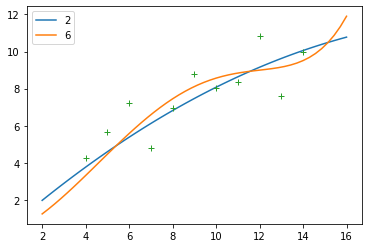

In [ ]:
x_ = np.linspace(2, 16).reshape(-1, 1)

pd.DataFrame(
  {n: Pipeline([('poly', PolynomialFeatures(degree=n)),
                 ('linear', ElasticNet(fit_intercept=False))]).fit(X, data.Y).predict(x_)
                 for n in (2, 6)},
  index = x_[:,0]
).plot()
plt.plot(X, data.Y, '+')
plt.show()

## Логистическая 

Вместо вещественных чисел будем предсказывать числа из [0, 1]


<img src='https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png' width=600/>

$\displaystyle\sigma(x) = \frac{1}{1 + e^{-x}}$

Задача теперь формулируется так:

**Предсказания:** $$
y_{pred}(x, w) = \frac{1}{1 + e^{-\langle x, w \rangle}}
$$

**Функция потерь (LogLoss):** $$
L(y_{pred}, y) = -y\, log\,y_{pred} - (1-y)\,log\,(1-y_{pred})
$$

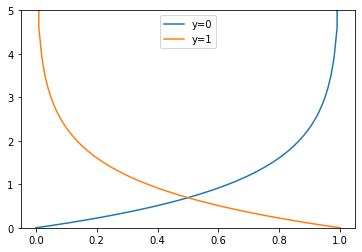

In [ ]:
from sklearn.metrics import log_loss

yhat = [x*0.01 for x in range(0, 101)]
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
plt.plot(yhat, losses_0, label='y=0')
plt.plot(yhat, losses_1, label='y=1')
plt.ylim((0, 5))
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


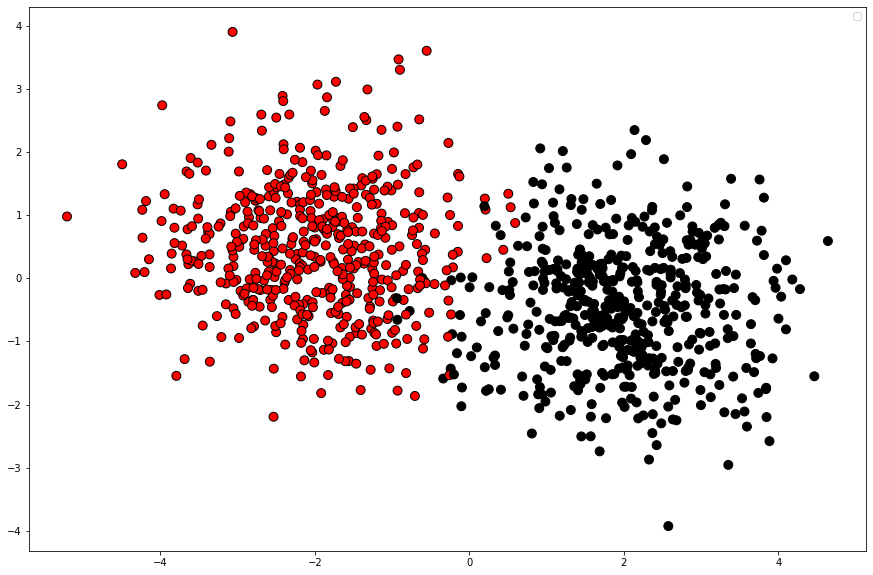

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=13)

colors = ("red", "k")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y, edgecolors='K', s=80)
plt.legend()
plt.show()

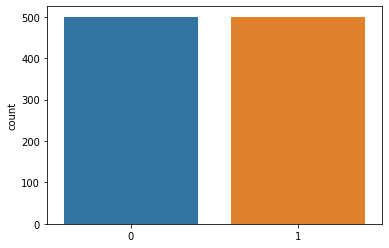

In [ ]:
import seaborn as sns

sns.countplot(x=y)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X, y)

LogisticRegression(random_state=0)

[0]


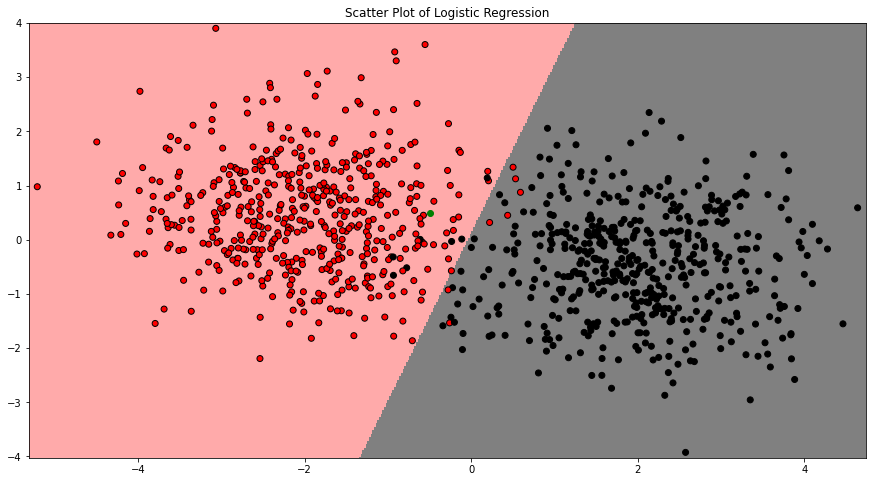

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=13)
eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))



Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

R = clf.predict(np.c_[-0.5, 0.5])

print(R)

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', 'grey'])
plt.title('Scatter Plot of Logistic Regression')
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
point = plt.scatter(X[:, 0], X[:, 1], c=colored_y, edgecolors='K')
plt.scatter(-0.5, 0.5, c="green")
plt.show()



# Задание

1. Оценить вероятности принадлежности точки (-0.5, 0.5) к классам 0 и 1 в последнем примере
2. Попытаться применить регрессию к какой-либо переменной в собственном датасете.





In [ ]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()

# x_train, x_test, y_train, y_test = train_test_split(xx, yy, random_state=1)







